In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [3]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [4]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0
...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0


# Data Preparation

### Returns

In [5]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!
yen_futures['Return'] = yen_futures['Settle'].pct_change()*100
yen_futures.drop(columns = 'Change', inplace=True)

In [6]:
yen_futures.dropna()

,Open,High,Low,Last,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,
1990-01-03,6877.0,6910.0,6865.0,6887.0,6887.0,38206.0,53860.0,0.584197
1990-01-04,6937.0,7030.0,6924.0,7008.0,7008.0,49649.0,55699.0,1.756933
1990-01-05,6952.0,6985.0,6942.0,6950.0,6950.0,29944.0,53111.0,-0.827626
1990-01-08,6936.0,6972.0,6936.0,6959.0,6959.0,19763.0,52072.0,0.129496
1990-01-09,6918.0,6927.0,6892.0,6915.0,6915.0,29784.0,52111.0,-0.632275
...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,9338.0,99153.0,145470.0,-0.410601
2019-10-10,9343.5,9380.5,9293.5,9301.0,9303.5,159397.0,144474.0,-0.369458
2019-10-11,9308.5,9309.0,9240.0,9267.0,9251.0,158810.0,147471.0,-0.564304


### Lagged Returns 

In [7]:
# Create a lagged return using the shift function
yen_futures['Lagged_Return'] = yen_futures['Return'].shift(periods=1)

In [8]:
yen_futures.dropna(inplace = True)

In [9]:
yen_futures

,Open,High,Low,Last,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,
1990-01-04,6937.0,7030.0,6924.0,7008.0,7008.0,49649.0,55699.0,1.756933,0.584197
1990-01-05,6952.0,6985.0,6942.0,6950.0,6950.0,29944.0,53111.0,-0.827626,1.756933
1990-01-08,6936.0,6972.0,6936.0,6959.0,6959.0,19763.0,52072.0,0.129496,-0.827626
1990-01-09,6918.0,6927.0,6892.0,6915.0,6915.0,29784.0,52111.0,-0.632275,0.129496
1990-01-10,6905.0,6940.0,6885.0,6887.0,6887.0,34290.0,54735.0,-0.404917,-0.632275
...,...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,9251.0,158810.0,147471.0,-0.564304,-0.369458


### Train Test Split

In [10]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2017']
test = yen_futures['2018':]

In [11]:
train

,Open,High,Low,Last,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,
1990-01-04,6937.0,7030.0,6924.0,7008.0,7008.0,49649.0,55699.0,1.756933,0.584197
1990-01-05,6952.0,6985.0,6942.0,6950.0,6950.0,29944.0,53111.0,-0.827626,1.756933
1990-01-08,6936.0,6972.0,6936.0,6959.0,6959.0,19763.0,52072.0,0.129496,-0.827626
1990-01-09,6918.0,6927.0,6892.0,6915.0,6915.0,29784.0,52111.0,-0.632275,0.129496
1990-01-10,6905.0,6940.0,6885.0,6887.0,6887.0,34290.0,54735.0,-0.404917,-0.632275
...,...,...,...,...,...,...,...,...,...
2017-12-22,8871.0,8882.5,8864.5,8880.5,8881.0,71339.0,230870.0,0.118370,0.084621
2017-12-26,8879.0,8898.5,8873.5,8884.5,8891.5,33864.0,229084.0,0.118230,0.118370
2017-12-27,8887.0,8895.0,8869.0,8870.5,8878.0,86378.0,228295.0,-0.151830,0.118230


In [12]:
test

,Open,High,Low,Last,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,
2018-01-02,8909.5,8957.5,8898.5,8938.0,8940.5,96714.0,227884.0,0.297285,0.224871
2018-01-03,8943.0,8947.5,8913.0,8921.0,8919.0,93498.0,226582.0,-0.240479,0.297285
2018-01-04,8917.0,8920.5,8891.0,8901.0,8900.0,115434.0,224918.0,-0.213028,-0.240479
2018-01-05,8897.0,8902.0,8854.0,8878.0,8868.5,133023.0,229326.0,-0.353933,-0.213028
2018-01-08,8870.5,8889.0,8849.5,8872.5,8874.0,81647.0,237100.0,0.062017,-0.353933
...,...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,9251.0,158810.0,147471.0,-0.564304,-0.369458


In [13]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!

X_train = train['Lagged_Return'].to_frame().dropna()
X_test = test['Lagged_Return'].to_frame().dropna()
Y_train = train['Return'].to_frame().dropna()
Y_test = test['Return'].to_frame().dropna()

In [14]:
X_train

,Lagged_Return
Date,
1990-01-04,0.584197
1990-01-05,1.756933
1990-01-08,-0.827626
1990-01-09,0.129496
1990-01-10,-0.632275
...,...
2017-12-22,0.084621
2017-12-26,0.118370
2017-12-27,0.118230


In [15]:
Y_test

,Return
Date,
2018-01-02,0.297285
2018-01-03,-0.240479
2018-01-04,-0.213028
2018-01-05,-0.353933
2018-01-08,0.062017
...,...
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304


In [16]:
X_test

,Lagged_Return
Date,
2018-01-02,0.224871
2018-01-03,0.297285
2018-01-04,-0.240479
2018-01-05,-0.213028
2018-01-08,-0.353933
...,...
2019-10-09,0.170931
2019-10-10,-0.410601
2019-10-11,-0.369458


# Linear Regression Model

In [17]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, Y_train);

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [18]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [19]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = Y_test
Results["Predicted Return"] = predictions

In [20]:
Results

,Return,Predicted Return
Date,,
2018-01-02,0.297285,0.003815
2018-01-03,-0.240479,0.003046
2018-01-04,-0.213028,0.008759
2018-01-05,-0.353933,0.008467
2018-01-08,0.062017,0.009964
...,...,...
2019-10-09,-0.410601,0.004388
2019-10-10,-0.369458,0.010566
2019-10-11,-0.564304,0.010129


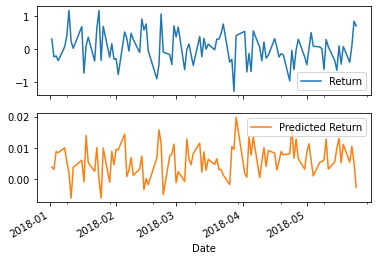

In [21]:
# Plot the first 20 predictions vs the true values
Results[:100].plot(subplots=True);

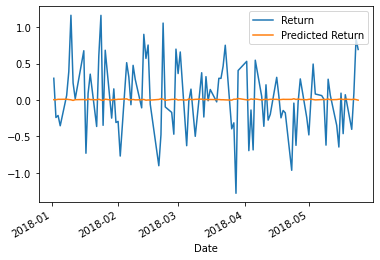

In [22]:
Results[:100].plot();

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [23]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)
mse

0.1711067337237333

In [24]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.4136504970669482


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [26]:
# Construct a dataframe using just the "y" training data:
in_sample_results = Y_train

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results['In_Sample'] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_samp_mse = mean_squared_error(
    in_sample_results['Return'],
    in_sample_results['In_Sample']
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
root_in_samp_mse = np.sqrt(in_samp_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {root_in_samp_mse}")

In-sample Root Mean Squared Error (RMSE): 0.7059387714146014


# Conclusions

YOUR CONCLUSIONS HERE!

The MSE is low and the In-sample RMSE is higher than the Out-of-Sample which is good, but the model itself just seems to predict basically no return. What I'm concluding here is that basically the model is predicting the price to stay the same and it's differentiating the daily fluctuations as noise.